## Simpson's Paradox

In groups A and B:  
mean A < mean B,  
but in subgroups    
  mean Ax > mean Bx and mean Ay > mean By

todo: description

In [1]:
import pandas as pd
import numpy as np
np.random.seed(7)

import scipy.stats as stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
p_a = 0.45
n_a = 1000
p_b = 0.55
n_b = 1000

# key frames
# p_ar = 0.47, n_ar = 500, p_br = 0.57, n_br = 500
# p_ar = 0.60, n_ar = 500, p_br = 0.57, n_br = 500
# p_ar = 0.60, n_ar = 500, p_br = 0.57, n_br = 900
# p_ar = 0.60, n_ar = 200, p_br = 0.57, n_br = 900
# p_ar = 0.47, n_ar = 200, p_br = 0.57, n_br = 900
# p_ar = 0.47, n_ar = 200, p_br = 0.57, n_br = 500
# p_ar = 0.47, n_ar = 500, p_br = 0.57, n_br = 500

frames = []
frames = frames + [(p_ar, 500, 0.57, 500) for p_ar in np.arange(0.47, 0.60, 0.0101)]
frames = frames + [(0.60, 500, 0.57, 500)] * 3
frames = frames + [(0.60, 500, 0.57, n_br) for n_br in np.arange(500, 901, 20)]
frames = frames + [(0.60, 500, 0.57, 900)] * 3
frames = frames + [(0.60, n_ar, 0.57, 900) for n_ar in np.arange(500, 199, -20)]
frames = frames + [(0.60, 200, 0.57, 900)] * 30
frames = frames + [(p_ar, 200, 0.57, 900) for p_ar in np.arange(0.6, 0.47, -0.0101)]
frames = frames + [(0.47, 200, 0.57, 900)] * 3
frames = frames + [(0.47, 200, 0.57, n_br) for n_br in np.arange(900, 499, -19)]
frames = frames + [(0.47, 200, 0.57, 500)] * 3
frames = frames + [(0.47, n_ar, 0.57, 500) for n_ar in np.arange(200, 501, 20)]

frames = [(p_ar, n_ar, (p_a * n_a - p_ar * n_ar) / (n_a - n_ar), n_a - n_ar,
           p_br, n_br, (p_b * n_b - p_br * n_br) / (n_b - n_br), n_b - n_br) 
           for (p_ar, n_ar, p_br, n_br) in frames]

#display(frames[0:5])
#print('...')
#display(frames[-5:-1])

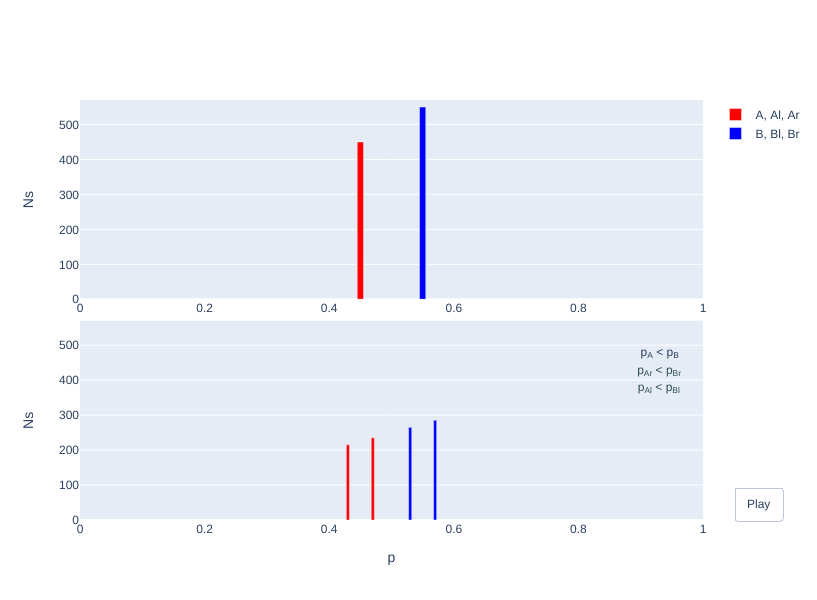

In [10]:
p_ar, n_ar, p_al, n_al, p_br, n_br, p_bl, n_bl = frames[0]

fig = make_subplots(
    rows=2, cols=1,
    vertical_spacing=0.051
)

fig.add_trace(go.Bar(x=[p_a], y=[p_a * n_a], width=0.01, name='A, Al, Ar', marker_color='red'), row=1, col=1)
fig.add_trace(go.Bar(x=[p_b], y=[p_b * n_b], width=0.01, name='B, Bl, Br', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Bar(x=[p_ar], y=[p_ar * n_ar], width=0.005, name='Ar', showlegend=False, marker_color='red'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_al], y=[p_al * n_al], width=0.005, name='Al', showlegend=False, marker_color='red'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_br], y=[p_br * n_br], width=0.005, name='Br', showlegend=False, marker_color='blue'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_bl], y=[p_bl * n_bl], width=0.005, name='Bl', showlegend=False, marker_color='blue'), row=2, col=1)

antext = f"p<sub>A</sub> {'>' if p_a > p_b else '<'} p<sub>B</sub>"
antext_r = f"p<sub>Ar</sub> {'>' if p_ar > p_br else '<'} p<sub>Br</sub>"
anc_r = 'red' if p_ar > p_br else 'darkslategrey'
antext_l = f"p<sub>Al</sub> {'>' if p_al > p_bl else '<'} p<sub>Bl</sub>"
anc_l = 'red' if p_al > p_bl else 'darkslategrey'
fig.add_annotation(x=0.93, y=480,
                   xref='x2', yref='y2',
                   text=antext,
                   align='center',
                   showarrow=False)
fig.add_annotation(x=0.93, y=430,
                   xref='x2', yref='y2',
                   text=antext_r,
                   font_color=anc_r,
                   align='center',
                   showarrow=False)
fig.add_annotation(x=0.93, y=380,
                   xref='x2', yref='y2',
                   text=antext_l,
                   font_color=anc_l,
                   align='center',
                   showarrow=False)

fig_frames = []
for (p_ar, n_ar, p_al, n_al, p_br, n_br, p_bl, n_bl) in frames:
    antext = f"p<sub>A</sub> {'>' if p_a > p_b else '<'} p<sub>B</sub>"
    antext_r = f"p<sub>Ar</sub> {'>' if p_ar > p_br else '<'} p<sub>Br</sub>"
    anc_r = 'red' if p_ar > p_br else 'darkslategrey'
    antext_l = f"p<sub>Al</sub> {'>' if p_al > p_bl else '<'} p<sub>Bl</sub>"
    anc_l = 'red' if p_al > p_bl else 'darkslategrey'

    layout_i = go.Layout(annotations=[
        go.layout.Annotation(x=0.93, y=480,
                             xref='x2', yref='y2',
                             text=antext,
                             align='center',
                             showarrow=False),
        go.layout.Annotation(x=0.93, y=430,
                             xref='x2', yref='y2',
                             text=antext_r,
                             font_color=anc_r,
                             align='center',
                             showarrow=False),
        go.layout.Annotation(x=0.93, y=380,
                             xref='x2', yref='y2',
                             text=antext_l,
                             font_color=anc_l,
                             align='center',
                             showarrow=False)
    ])

    fig_frames.append(go.Frame(data=[go.Bar(visible=True),
                                     go.Bar(visible=True),
                                     go.Bar(x=[p_ar], y=[p_ar * n_ar]),
                                     go.Bar(x=[p_al], y=[p_al * n_al]),
                                     go.Bar(x=[p_br], y=[p_br * n_br]),
                                     go.Bar(x=[p_bl], y=[p_bl * n_bl])],
                               traces=[0,1,2,3,4,5],
                               layout=layout_i))

fig.frames=fig_frames
button = dict(
             label='Play',
             method='animate',
             args=[None, dict(frame=dict(duration=50, redraw=False), 
                              transition=dict(duration=0),
                              fromcurrent=True,
                              mode='immediate')])
fig.update_layout(updatemenus=[dict(type='buttons',
                              showactive=False,
                              y=0,
                              x=1.05,
                              xanchor='left',
                              yanchor='bottom',
                              buttons=[button])])

fig.update_layout(xaxis_range=[0,1],
                  xaxis2_range=[0,1],
                  yaxis_range=[0,570],
                  yaxis2_range=[0,570],
                  xaxis2_title='p',
                  yaxis_title='Ns',
                  yaxis2_title='Ns',
                  height=600)